In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the dataset with the necessary features


In [2]:
books = pd.read_json(r'C:/Users/anjum/Documents/New Folder/goodreads_books_poetry.json', lines=True)
books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",,false,3.83,,...,11,,1887,https://www.goodreads.com/book/show/16037549-v...,https://images.gr-assets.com/books/1348176637m...,16037549,3,5212748,Vision of Sir Launfal and Other Poems,Vision of Sir Launfal and Other Poems
1,0811223981,2,[],US,,"[{'count': '100', 'name': 'to-read'}, {'count'...",,false,3.83,B00U2WY9U8,...,4,,2015,https://www.goodreads.com/book/show/22466716-f...,https://images.gr-assets.com/books/1404958407m...,22466716,37,41905435,Fairy Tales: Dramolettes,Fairy Tales: Dramolettes
2,0374428115,7,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,4.38,,...,7,,2008,https://www.goodreads.com/book/show/926662.Gro...,https://s.gr-assets.com/assets/nophoto/book/11...,926662,45,911665,Growltiger's Last Stand and Other Poems,Growltiger's Last Stand and Other Poems
3,0156182890,12,[],US,,"[{'count': '554', 'name': 'to-read'}, {'count'...",,false,3.71,B00IWTRB1W,...,3,,1964,https://www.goodreads.com/book/show/926667.The...,https://images.gr-assets.com/books/1382939971m...,926667,115,995066,The Cocktail Party,The Cocktail Party
4,1942004192,4,[],US,eng,"[{'count': '228', 'name': 'to-read'}, {'count'...",,false,5.00,,...,12,First,2015,https://www.goodreads.com/book/show/29065952-l...,https://images.gr-assets.com/books/1455198396m...,29065952,9,49294781,Louder Than Everything You Love,Louder Than Everything You Love


In [3]:
books_selected = books[['book_id', 'average_rating', 'is_ebook', 'num_pages', 
                                          'publication_year', 'ratings_count', 'language_code']]

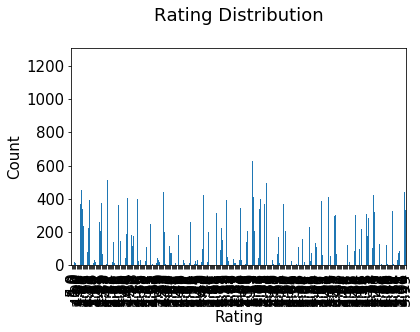

In [4]:
plt.rc("font", size=15)
books.average_rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [5]:
ratings = pd.read_json(r'C:/Users/anjum/Documents/New Folder/goodreads_interactions_poetry.json', lines=True)
ratings.head()

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,8842281e1d1347389f2ab93d60773d4d,1384,1bad0122cebb4aa9213f9fe1aa281f66,True,4,,Wed May 09 09:33:44 -0700 2007,Wed May 09 09:33:44 -0700 2007,,
1,8842281e1d1347389f2ab93d60773d4d,1376,eb6e502d0c04d57b43a5a02c21b64ab4,True,4,,Wed May 09 09:33:18 -0700 2007,Wed May 09 09:33:18 -0700 2007,,
2,8842281e1d1347389f2ab93d60773d4d,30119,787564bef16cb1f43e0f641ab59d25b7,True,5,,Sat Jan 13 13:44:20 -0800 2007,Wed Mar 22 11:45:08 -0700 2017,Tue Mar 01 00:00:00 -0800 1983,
3,72fb0d0087d28c832f15776b0d936598,24769928,8c80ee74743d4b3b123dd1a2e0c0bcac,False,0,,Wed Apr 27 11:05:51 -0700 2016,Wed Apr 27 11:05:52 -0700 2016,,
4,72fb0d0087d28c832f15776b0d936598,30119,2a83589fb597309934ec9b1db5876aaf,True,3,,Mon Jun 04 18:58:08 -0700 2012,Mon Jun 04 18:58:13 -0700 2012,,


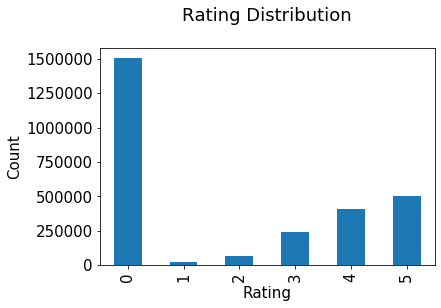

In [6]:
plt.rc("font", size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [7]:
books.shape

(36514, 29)

In [8]:
ratings.shape

(2734350, 10)

In [9]:
rating_count = pd.DataFrame(ratings.groupby('book_id')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
book_id,
1381,76107
30119,75306
1420,67747
1371,36606
23513349,28137


The book with book_id “1381” received the most rating counts. Let’s find out what book it is, and what books are in the top 5.



In [11]:
most_rated_books = pd.DataFrame(['1381', '30119', '1420', '1371', '23513349'], index=np.arange(5), columns = ['book_id'])


In [12]:
books_selected

,book_id,average_rating,is_ebook,num_pages,publication_year,ratings_count,language_code
0,16037549,3.83,false,80,1887,3,eng
1,22466716,3.83,false,128,2015,37,
2,926662,4.38,false,,2008,45,
3,926667,3.71,false,190,1964,115,
4,29065952,5.00,false,118,2015,9,eng
...,...,...,...,...,...,...,...
36509,9874488,5.00,true,,,1,eng
36510,7657489,3.65,true,288,,3,
36511,3762261,3.50,false,,,2,
36512,23452091,3.73,false,487,2013,55,spa


In [13]:
books_selected['book_id']= books_selected['book_id'].astype(int)

C:\Users\anjum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Recommendations based on correlations¶


In [17]:
average_rating = pd.DataFrame(ratings.groupby('book_id')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('book_id')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,rating,ratingCount
book_id,,
1381,2.570447,76107
30119,3.560420,75306
1420,2.914668,67747
1371,2.290717,36606
23513349,2.079895,28137


# To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [18]:
counts1 = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(counts1[counts1 >= 200].index)]
counts = ratings['rating'].value_counts()
ratings = ratings[ratings['rating'].isin(counts[counts >= 100].index)]

In [32]:
ratings_pivot = ratings.pivot(index='user_id', columns='book_id').rating
user_id = ratings_pivot.index
book_id = ratings_pivot.columns


In [35]:
#print(ratings_pivot.shape)
#ratings_pivot = pd.DataFrame(ratings_pivot)
ratings_pivot.head()

book_id,234,236,241,254,284,285,286,289,290,291,...,36286613,36297491,36302936,36307639,36350410,36390749,36403877,36417323,36441514,36443173
user_id,,,,,,,,,,,,,,,,,,,,,
00aa6364189f8409465679411851136c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01344f0e638cbbd87cd2d1bdade1ea31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
014dcb4a9792ff3cc874bcd56800a8bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
027547cbd92fafd620864d0ea28cb136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02f8e884d94978f7667ae13d91c84e62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
books.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

# Collaborative Filtering Using k-Nearest Neighbors (kNN)¶


In [68]:

combine_book_rating = pd.merge(ratings, books, on='book_id')
columns = ['publisher','similar_books','description','popular_shelves','text_reviews_count','authors','average_rating','average_rating','link','format','country_code','language_code','asin','isbn', 'series', 'kindle_asin', 'image_url', 'title_without_series', 'is_ebook','isbn13','review_id','is_read','review_text_incomplete','date_added','date_updated','read_at','started_at','num_pages','publication_day','publication_month','edition_information','publication_year','url','work_id']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,user_id,book_id,rating,ratings_count,title
0,72e53968245c2dadb6d4defbaa845eb1,385196,5,237,The Orchard
1,c172682aee164ad566766937ad0cb732,385196,5,237,The Orchard
2,55bea8421fbd1f96790bcaa6302b5aab,385196,0,237,The Orchard
3,b2d56f5bad107c368fd292a3c59271ca,385196,5,237,The Orchard
4,9c7ae522d9a21037ed806864d48963f8,385196,5,237,The Orchard


In [69]:
combine_book_rating.shape

(229101, 5)

In [70]:

combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
book_ratingCount.head(10)

,title,totalRatingCount
0,,8
1,"""A"" - 24",1
2,"""Hope"" is the thing with feathers",2
3,"""I Am"": The Selected Poetry of John Clare",22
4,"""Language"" Poetries: An Anthology",2
5,"""Punks""",5
6,"""Something Urgent I Have to Say to You"": The L...",3
7,"""To His Coy Mistress"" and Other Poems",4
8,"""كتاب الصور"" يليه ""قصائد جديدة""",4
9,"""چهل نامه كوتاه به همسرم""",1


In [71]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,user_id,book_id,rating,ratings_count,title,totalRatingCount
0,72e53968245c2dadb6d4defbaa845eb1,385196,5,237,The Orchard,38
1,c172682aee164ad566766937ad0cb732,385196,5,237,The Orchard,38
2,55bea8421fbd1f96790bcaa6302b5aab,385196,0,237,The Orchard,38
3,b2d56f5bad107c368fd292a3c59271ca,385196,5,237,The Orchard,38
4,9c7ae522d9a21037ed806864d48963f8,385196,5,237,The Orchard,38


In [72]:

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   21780.000
mean       10.519
std        36.485
min         1.000
25%         2.000
50%         4.000
75%        11.000
max      3760.000
Name: totalRatingCount, dtype: float64


In [73]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))


0.900   24.000
0.910   26.000
0.920   29.000
0.930   31.000
0.940   35.000
0.950   38.000
0.960   44.000
0.970   51.630
0.980   63.000
0.990   89.000
Name: totalRatingCount, dtype: float64


In [74]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,user_id,book_id,rating,ratings_count,title,totalRatingCount
98,72e53968245c2dadb6d4defbaa845eb1,236183,3,74,Selected Poems,3760
99,aba7b914ae99cb1bea7743ff31cd7982,236183,0,74,Selected Poems,3760
100,24fe35e6618865d584796ef311c30b77,236183,0,74,Selected Poems,3760
101,c7493177025867bd43d7c7cac75988eb,236183,0,74,Selected Poems,3760
102,178a6401dcf7ca4a7e60b157b5e9fa61,236183,0,74,Selected Poems,3760


# Implimenting KNN with COsine similarity

In [75]:


from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')


In [76]:
from scipy.sparse import csr_matrix


In [ ]:
sparse.hstack(X, A) # error
sparse.hstack(X.astype(object), A) # cast X to object; return object
sparse.hstack(X, A.astype(float)) # cast A to float; return float
hstack(X.A, A) # make X dense, result will be type object

In [79]:
rating_popular_book = rating_popular_book.drop_duplicates(['book_id', 'title'])


In [80]:
rating_popular_book_pivot = rating_popular_book.pivot(index = 'title', columns = 'book_id', values = 'title').fillna(0)


In [81]:
rating_popular_book_pivot

book_id,286,291,676,1371,1372,1374,1376,1381,1382,1383,...,33866948,34031517,34068470,34078564,34099183,34209456,34227456,34541761,34608938,35489040
title,,,,,,,,,,,,,,,,,,,,,
", said the shotgun to the head.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Love Sonnets,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Poems from the Japanese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Selected Poems,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77 Dream Songs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
مأساة الحلاج,0,0,0,0,0,0,0,0,0,0,...,0,مأساة الحلاج,0,0,0,0,0,0,0,0
ما يفوق الوصف,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ولدت هناك، ولدت هنا,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
user_id = list(rating_popular_book_pivot.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [84]:
user_dict

{', said the shotgun to the head.': 0,
 '100 Love Sonnets': 1,
 '100 Poems from the Japanese': 2,
 '100 Selected Poems': 3,
 '77 Dream Songs': 4,
 '95 Poems': 5,
 'A Beautiful Marsupial Afternoon: New (Soma)tics': 6,
 'A Book of Luminous Things: An International Anthology of Poetry': 7,
 'A Book of Nonsense': 8,
 "A Child's Christmas in Wales": 9,
 "A Child's Garden of Verses": 10,
 'A Coney Island of the Mind': 11,
 'A Light in the Attic': 12,
 'A Little Larger Than the Entire Universe: Selected Poems': 13,
 'A New Selected Poems': 14,
 'A Poetry Handbook': 15,
 'A Season in Hell/The Drunken Boat': 16,
 'A Shropshire Lad': 17,
 'A Thousand Mornings': 18,
 'A Village Life': 19,
 'A Wild Patience Has Taken Me This Far': 20,
 'A Wreath for Emmett Till': 21,
 'ABC of Reading': 22,
 'Above the River: The Complete Poems': 23,
 'Actual Air': 24,
 "Adrienne Rich's Poetry and Prose": 25,
 'Against Forgetting: Twentieth-Century Poetry of Witness': 26,
 'Aimless Love: New and Selected Poems': 27

In [94]:
from sklearn.preprocessing import OneHotEncoder
lb = OneHotEncoder()